### Summary
Steps:
1. 先 join based on ip_address, 找出每個使用者所在的國家
2. 做 segments，怎樣的 features 會影響 class
3. Y = class (whether the activity was fraudulent (1) or not (0))，用 decision tree/random forest 去看 features 狀況


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeClassifier

In [63]:
fraud = pd.read_csv("/Users/eve/Desktop/Datasets/DataMasked_Identify_Fraudulent_Activities/Fraud_Data.csv")
fraud.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0


In [64]:
ip = pd.read_csv("/Users/eve/Desktop/Datasets/DataMasked_Identify_Fraudulent_Activities/IpAddress_to_Country.csv")
ip.head(2)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China


In [65]:
country = []
for i in range(len(fraud)):
    tmp = ip[(fraud["ip_address"][i] >= ip["lower_bound_ip_address"]) 
         & (fraud["ip_address"][i] <= ip["upper_bound_ip_address"])]["country"].values
    country.append(tmp)
    

In [66]:
fraud["country"] = country
fraud.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,[Japan]
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,[United States]


In [67]:
fraud["device_count"] = fraud.groupby(["device_id"])["device_id"].transform('count')

In [68]:
fraud["ip_count"] = fraud.groupby(['ip_address'])["ip_address"].transform("count")

In [69]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_count,ip_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,[Japan],1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,[United States],1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,[United States],12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,[],1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,[United States],1,1
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,[Canada],1,1
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,[],1,1
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,[United States],1,1
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,[China],1,1
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,[United States],1,1


### Feature Engineering

In [70]:
fraud["signup_time"] = pd.to_datetime(fraud["signup_time"])
fraud["purchase_time"] = pd.to_datetime(fraud["purchase_time"])
fraud["time_diff"] = (fraud["purchase_time"] - fraud["signup_time"]).dt.days

In [71]:
fraud.head(2)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,device_count,ip_count,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,[Japan],1,1,52
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,[United States],1,1,0


In [72]:
data = fraud.copy()
data.info() # 原本 country 數量是 151112，但是使用 data["country"].str.get(0) 就只剩下 129146
# 這中間的差額是 [None]，需要用 replace([None], "not found", inplace = True) 來處理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 15 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
device_count      151112 non-null int64
ip_count          151112 non-null int64
time_diff         151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(7), object(5)
memory usage: 17.3+ MB


In [73]:
data["country"] = data['country'].str.get(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 15 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           129146 non-null object
device_count      151112 non-null int64
ip_count          151112 non-null int64
time_diff         151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(7), object(5)
memory usage: 17.3+ MB


In [74]:
data.groupby(["country"]).size().nlargest(10)

country
United States        58049
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Italy                 1944
dtype: int64

In [75]:
data["country"].replace([None], "Not found", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 15 columns):
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
device_count      151112 non-null int64
ip_count          151112 non-null int64
time_diff         151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(7), object(5)
memory usage: 17.3+ MB


In [76]:
# Learn
bottom = data.groupby(["country"]).size().sort_values(ascending = False)[50:].index
bottom

Index(['Singapore', 'Pakistan', 'Philippines', 'Bulgaria', 'Morocco',
       'Algeria', 'Peru', 'Tunisia', 'United Arab Emirates', 'Ecuador',
       ...
       'Myanmar', 'Bonaire; Sint Eustatius; Saba', 'Madagascar', 'Gambia',
       'Niger', 'British Indian Ocean Territory', 'Cape Verde', 'Guadeloupe',
       'Dominica', 'Nauru'],
      dtype='object', name='country', length=132)

In [77]:
data["country"].replace(bottom, "Others", inplace = True)
# # 另法
# x = dict.fromkeys(bottom, 'Other')
# data["country"] = data["country"].replace(x)

In [78]:
data = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id'], axis = 1)
data.head(2)

,purchase_value,source,browser,sex,age,ip_address,class,country,device_count,ip_count,time_diff
0,34,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,52
1,16,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8614f9be80>,
      dtype=object)

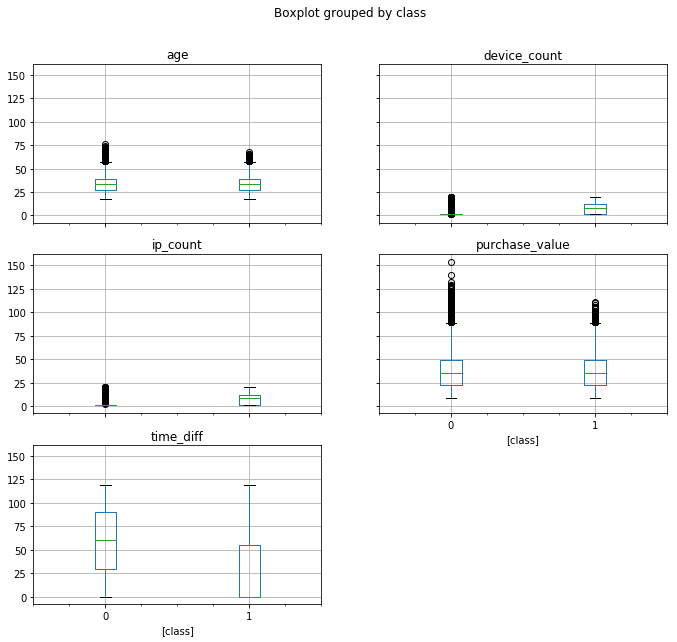

In [144]:
# plt.boxplot(data[["purchase_value", "age", "device_count", "ip_count", "time_diff"]])
# plt.title("Boxplot for fraud data")
# plt.show()
# data[["purchase_value", "age", "device_count", "ip_count", "time_diff"]].boxplot()
data[["purchase_value", "age", "device_count", "ip_count", "time_diff", "class"]].boxplot(by = "class", figsize = [11, 10])

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [80]:
df = pd.get_dummies(data, drop_first= True)
df.head(2)

,purchase_value,age,ip_address,class,device_count,ip_count,time_diff,source_Direct,source_SEO,browser_FireFox,...,country_Sweden,country_Switzerland,country_Taiwan; Republic of China (ROC),country_Thailand,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Venezuela,country_Viet Nam
0,34,39,7.327584e+08,0,1,1,52,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,16,53,3.503114e+08,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
train, test = train_test_split(df, test_size= 0.34)

In [82]:
clt = RandomForestClassifier(n_estimators = 100, max_features = 3, oob_score = True)
clt.fit(train.drop('class', axis = 1), train["class"])

RandomForestClassifier(max_features=3, oob_score=True)

In [83]:
clt.oob_score_

0.9555312684868599

In [84]:
# Prediction
clt.predict(test.drop(['class'], axis = 1))

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
clt.score(test.drop(["class"], axis = 1), test["class"])

0.9571420230055081

### Model Metrics

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [87]:
# Train set - confusion matrix
pd.DataFrame(confusion_matrix(train['class'], clt.oob_decision_function_[:,1].round(), labels=[0, 1]))

,0,1
0,90232,102
1,4333,5066


In [88]:
# Test set - confusion matrix
pd.DataFrame(confusion_matrix(test['class'], clt.predict(test.drop('class', axis=1)), labels=[0, 1]))

,0,1
0,46583,44
1,2158,2594


In [89]:
#Predictions as probabilities
pred_prob = clt.predict_proba(test.drop('class', axis=1))[:,1]
pred_prob

array([0.04, 0.03, 0.  , ..., 0.01, 0.13, 0.04])

In [90]:
#Predictions as actual classes
clt.predict(test.drop('class', axis=1))

array([0, 0, 0, ..., 0, 0, 0])

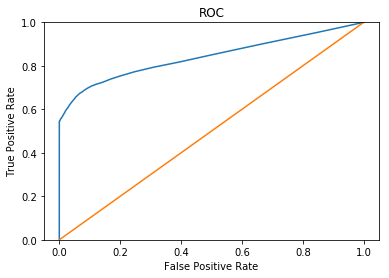

In [91]:
fpr, tpr, thresholds = roc_curve(test['class'],pred_prob)
#plot
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Feature Importance
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer

In [92]:
data.head(2)

,purchase_value,source,browser,sex,age,ip_address,class,country,device_count,ip_count,time_diff
0,34,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,52
1,16,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,0


In [108]:
y = data["class"]

In [109]:
categorical_cols = ['source', 'browser', 'sex', 'country']
numerical_cols = ['purchase_value', 'age', 'ip_address', 'device_count', 'ip_count', 'time_diff']
X = data[categorical_cols + numerical_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [110]:
categorical_encoder = OneHotEncoder(handle_unknown = 'ignore')
numerical_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'mean'))])

preprocessing = ColumnTransformer([('cat', categorical_encoder, categorical_cols),
                                  ('num', numerical_pipe, numerical_cols)])

In [145]:
# It's an imbalanced data
rf = Pipeline([('preprocess', preprocessing),
              ('classifier', RandomForestClassifier(n_estimators = 500, class_weight = 'balanced', random_state = 42))])
# rf.fit(X_train, y_train)

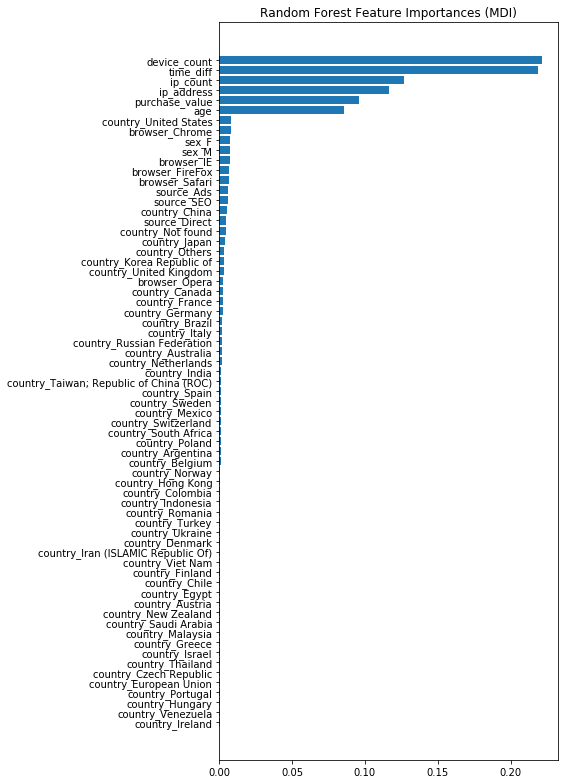

In [128]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_cols)
feature_names = np.r_[feature_names, numerical_cols]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize = (8, 11))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [129]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

exception calling callback for <Future at 0x7f862b3365f8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/eve/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/Users/eve/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/Users/eve/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py", line 524, in load_temporary_memmap
    obj = load(filename, mmap_mode)
  File "/Users/eve/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py", line 585, in load
    obj = _unpickle(fobj, filename, mmap_mode)
  File "/Users/eve/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py", line 504, in _unpickle
    obj = unpickler.load()
  File "/Users/eve/anaconda3/lib/python3.7/pickle.py", li

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

### Decision Tree

In [120]:
data.head(2)

,purchase_value,source,browser,sex,age,ip_address,class,country,device_count,ip_count,time_diff
0,34,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,52
1,16,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,0


In [121]:
#1. Prepare data
data_dummy = pd.get_dummies(data, drop_first=True)
training_cols = data_dummy.drop(['class'], axis = 1)

In [125]:
#2. Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

dt = DecisionTreeClassifier(class_weight = 'balanced', min_impurity_decrease = 0.001)
dt.fit(training_cols, data_dummy['class'])

DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.001)

In [126]:
#3. Draw decision tree plot
export_graphviz(dt, out_file = 'tree.dot', feature_names = training_cols.columns, proportion = True)
s = graphviz.Source.from_file("tree.dot")
s.view()

'tree.dot.pdf'

### Linear Regression

In [131]:
#1. Prepare data
y = data["class"].astype('int')
X = data[['purchase_value', 'age', 'device_count', 'ip_count', 'time_diff']]

In [132]:
#2. Modeling
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y) # the coefficient of determination R^2 of the prediction

0.45375971783940916

In [133]:
reg.coef_

array([-2.46808416e-05, -4.54253745e-05,  1.13450608e-01, -4.09824120e-02,
       -3.36015241e-04])

In [134]:
reg.intercept_

-0.010324586713217385

In [135]:
reg.predict(np.array([[0, 30, 50, 20, 30]]))

array([4.83111434])

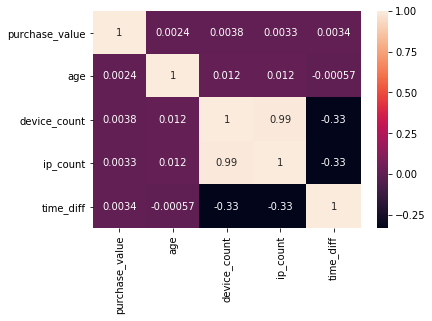

In [137]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, annot = True)